In [2]:
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
single_thread_df = pd.read_csv('single_thread_log.csv')
single_thread_df.head()

,type,nmax,nsteps,temp,order,threads,time
0,python,10,50,0.5,0.659899,1,0.132110
1,python,10,50,0.5,0.418634,1,0.154339
2,python,10,50,0.5,0.860815,1,0.143151
3,python,10,50,0.5,0.844300,1,0.147214
4,python,10,50,0.5,0.663591,1,0.139604


In [4]:
single_thread_python_df = single_thread_df[single_thread_df['type'] == 'python']
single_thread_numpy_df = single_thread_df[single_thread_df['type'] == 'numpy']
single_thread_numpy_sequential_df = single_thread_df[single_thread_df['type'] == 'numpy_sequential']
single_thread_numba_df = single_thread_df[single_thread_df['type'] == 'numba']
single_thread_cython_df = single_thread_df[single_thread_df['type'] == 'cython']
single_thread_cpp_df = single_thread_df[single_thread_df['type'] == 'cpp']
single_thread_cuda_df = single_thread_df[single_thread_df['type'] == 'cuda']

In [5]:
# average time for each nmax value
single_thread_python_grouped = single_thread_python_df.groupby('nmax')
single_thread_numpy_grouped = single_thread_numpy_df.groupby('nmax')
single_thread_numpy_sequential_grouped = single_thread_numpy_sequential_df.groupby('nmax')
single_thread_numba_grouped = single_thread_numba_df.groupby('nmax')
single_thread_cython_grouped = single_thread_cython_df.groupby('nmax')
single_thread_cpp_grouped = single_thread_cpp_df.groupby('nmax')
single_thread_cuda_grouped = single_thread_cuda_df.groupby('nmax')

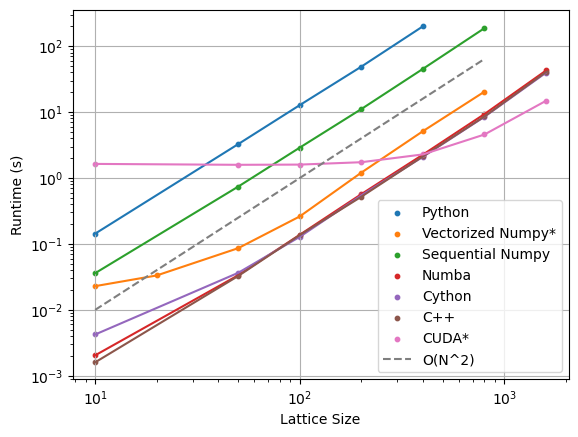

In [16]:
plt.scatter(single_thread_python_grouped["nmax"].first().values, single_thread_python_grouped["time"].mean().values, s=10)
plt.scatter(single_thread_numpy_grouped["nmax"].first().values, single_thread_numpy_grouped["time"].mean().values, s=10)
plt.scatter(single_thread_numpy_sequential_grouped["nmax"].first().values, single_thread_numpy_sequential_grouped["time"].mean().values, s=10)
plt.scatter(single_thread_numba_grouped["nmax"].first().values, single_thread_numba_grouped["time"].mean().values, s=10)
plt.scatter(single_thread_cython_grouped["nmax"].first().values, single_thread_cython_grouped["time"].mean().values, s=10)
plt.scatter(single_thread_cpp_grouped["nmax"].first().values, single_thread_cpp_grouped["time"].mean().values, s=10)
plt.scatter(single_thread_cuda_grouped["nmax"].first().values, single_thread_cuda_grouped["time"].mean().values, s=10)

plt.plot(single_thread_python_grouped["nmax"].first().values, single_thread_python_grouped["time"].mean().values, label='Python')
plt.plot(single_thread_numpy_grouped["nmax"].first().values, single_thread_numpy_grouped["time"].mean().values, label='Vectorized Numpy*')
plt.plot(single_thread_numpy_sequential_grouped["nmax"].first().values, single_thread_numpy_sequential_grouped["time"].mean().values, label='Sequential Numpy')
plt.plot(single_thread_numba_grouped["nmax"].first().values, single_thread_numba_grouped["time"].mean().values, label='Numba')
plt.plot(single_thread_cython_grouped["nmax"].first().values, single_thread_cython_grouped["time"].mean().values, label='Cython')
plt.plot(single_thread_cpp_grouped["nmax"].first().values, single_thread_cpp_grouped["time"].mean().values, label='C++')
plt.plot(single_thread_cuda_grouped["nmax"].first().values, single_thread_cuda_grouped["time"].mean().values, label='CUDA*')

plt.plot(single_thread_numpy_grouped["nmax"].first().values, (single_thread_numpy_grouped["nmax"].first().values)**2 / 10000, label='O(N^2)', linestyle='--')

plt.xscale("log")
plt.yscale("log")

plt.xlabel('Lattice Size')
plt.ylabel('Runtime (s)')
plt.legend()
plt.grid()